# Stripplot

This file creates the stripplot used in the paper. 

In [1]:
import pandas as pd 
from sklearn.metrics import pairwise, r2_score
from scipy.stats import pearsonr
import seaborn as sns 
import matplotlib.pyplot as plt  
from matplotlib.lines import Line2D
import numpy as np
import os
os.chdir(r'C:\Users\Venia\Desktop\reddit_music')
plt.rcParams['font.family'] = 'arial'


##### this is all preparing the data for the plot
df = pd.read_csv('data\\RedditMusic.csv')
df = df.drop_duplicates(subset=['id'])
genres = pd.read_csv('data\\genre_names_f.csv')[['label','genre','short']]
genres['short'] = genres['short'].fillna(genres['genre'])
gens = genres['short'].values
# scores_old = pd.read_csv('data\\cultural_scores.csv')
scores = pd.read_csv('data\\scores_z.csv')

dimen_list = [k for k in scores.columns if k != 'community']

df=pd.merge(df,genres,on='label')

data=df[['artist','subreddit','genre']]
data.columns = ['artist','community','genre']
data= pd.merge(data,scores, on='community')
artist_vals = data.groupby('artist')[dimen_list].mean()


In [6]:

# this will normalize the results by a max min scaler 

genre_vals = data.groupby('genre')[dimen_list].mean()


### IF WE ARE NOT USING Z-SCORES THEN WE NEED TO NORMALIZE -> 
# for k in dimen_list:
#     max_v = genre_vals[k].max()
#     min_v = genre_vals[k].min()
#     dif = max_v - min_v 
#     genre_vals[k] = genre_vals[k].apply(lambda x: (x- min_v) / dif)


genre_vals.reset_index(inplace=True)
genre_vals = pd.melt(genre_vals, id_vars=['genre'])

genre_vals.columns = ['genre','dimension','score']

vals = genre_vals

vals = vals.sort_values(by='score', ascending=True)
vals['score'] = vals['score']

dimen_list = ['age', 'partisan', 'gender', 'affluence', 'sociality', 'partisan_neutral']



vals = vals[vals['dimension'].isin(dimen_list)]


# vals.to_csv("data\\genre_cultural_feats_f.csv")


In [13]:
vals[vals['dimension']=='age'].sort_values(by='score')

,genre,dimension,score
15,hardstyle,age,-1.504974
43,rap 4,age,-1.475183
25,metalcore 2,age,-1.239472
26,monstercat,age,-1.232479
11,edm 2,age,-1.212152
8,despacito,age,-1.206612
42,rap 3,age,-1.181473
23,lo-fi,age,-1.175612
4,K-pop 2,age,-1.122885
29,otacore,age,-1.104048


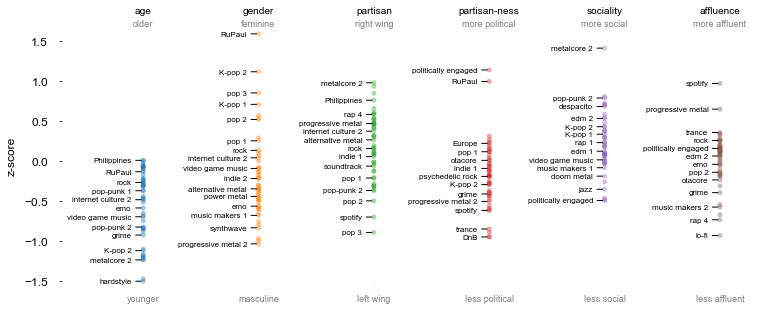

In [15]:
# vals = pd.read_csv("data\\genre_cultural_feats_f.csv")

# vals.columns = ['Unnamed: 0','genre','dimension','standardized score']
vals.columns = ['genre','dimension','standardized score']
vals['dimension'] = vals['dimension'].apply(lambda x: x if x != 'partisan_neutral' else 'partisan-ness')


custom_dict = {'age': 0, 'gender': 1, 'partisan':2,'partisan-ness': 3, 'sociality': 4, 'affluence':5} 
vals = vals.sort_values(by=['dimension','standardized score'], key=lambda x: x.map(custom_dict))


fig, ax = plt.subplots(1, figsize = (11,4.4))

sns.stripplot(x=vals['dimension'],y=vals['standardized score'], jitter = False, ax=ax, orient='v', alpha = 0.4, linewidth=0)
dimen_list = list(vals['dimension'].unique())
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(pad = 11,bottom=False)
color = "#808080"
fontsize= 9
ha = 'center'

ax.text(3,-1.75,'less political', color=color, fontsize=fontsize, ha = ha)
ax.text(3,1.68,'more political', color=color, fontsize=fontsize, ha = ha)
ax.text(2,-1.75,'left wing', color=color, fontsize=fontsize, ha = ha)
ax.text(2,1.68,'right wing', color=color, fontsize=fontsize, ha = ha)
ax.text(0,-1.75,'younger', color=color, fontsize=fontsize, ha = ha)
ax.text(0,1.68,'older', color=color, fontsize=fontsize, ha = ha)
ax.text(1,-1.75,'masculine', color=color, fontsize=fontsize, ha = ha)
ax.text(1,1.68,'feminine', color=color, fontsize=fontsize, ha = ha)
ax.text(4,-1.75,'less social', color=color, fontsize=fontsize, ha = ha)
ax.text(4,1.68,'more social', color=color, fontsize=fontsize, ha = ha)
ax.text(5,-1.75,'less affluent', color=color, fontsize=fontsize, ha = ha)
ax.text(5,1.68,'more affluent', color=color, fontsize=fontsize, ha = ha)

# -1.65,1.55
ax.xaxis.set_ticks_position('top')

y_old = {key:value for (key,value) in zip(dimen_list, vals.groupby('dimension')['standardized score'].min().T[custom_dict.keys()].T.values-1)}
y_max = {key:value for (key,value) in zip(dimen_list, vals.groupby('dimension')['standardized score'].max().T[custom_dict.keys()].T.values)}

# y_old = {key:value for (key,value) in zip(dimen_list, np.zeros(len(dimen_list))-1)}
# y_max = {key:value for (key,value) in zip(dimen_list, np.ones(len(dimen_list)))}


for i in range(len(vals)):
    x = vals['dimension'].values[i]
    y = vals['standardized score'].values[i]
    s = vals['genre'].values[i]
    if y == y_max[x]:
        ax.annotate(text= s, xy= (dimen_list.index(x),y), xytext= (dimen_list.index(x)- 0.1, y), horizontalalignment='right', arrowprops=dict(arrowstyle='-'), fontsize=8, color='black', verticalalignment='center')
#     if y == y_min[x]:
#         ax.annotate(text= s, xy= (dimen_list.index(x),y), xytext= (dimen_list.index(x)- 0.1, y), horizontalalignment='right', arrowprops=dict(arrowstyle='-'), fontsize=8, color='black', verticalalignment='center')
    elif (abs(y - y_old[x]) >= 0.092) & (abs(y-y_max[x])>=0.092): #& ((s!='K-pop 2') | (x != 'partisan')) & ((s!='synthwave') | (x != 'age')):
        ax.annotate(text= s, xy= (dimen_list.index(x),y), xytext= (dimen_list.index(x)- 0.1, y), horizontalalignment='right', arrowprops=dict(arrowstyle='-'), fontsize=8, color='black', verticalalignment='center')
        y_old[x] = y
    else:
        pass


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    tick.sticky_edges.x[:] = (-.3, 5)


plt.ylabel('z-score', fontsize = 12, labelpad = 7)
# ax.axis((-.72,5.5,-0.05,1.05))
ax.axis((-.7,5.5,-1.55,1.68)) 
ax.tick_params(axis='x', which='major', length=0)
plt.xlabel(None)
plt.tight_layout()
plt.savefig('visuals\\cultural-dimensions-plot_z_top2.pdf', dpi = 300,bbox_inches = 'tight')
plt.show()


In [4]:
genre_vals = data.groupby('genre')[dimen_list].mean()

In [6]:
genre_vals.to_csv('data\\genre_cultural_scores.csv')

In [83]:
df =pd.read_csv("data\\Reddit_Sub_Com_f2.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
